# Exercises in statistics

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [2]:
penguins_data = sns.load_dataset("penguins")

1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [3]:
penguins_data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [4]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


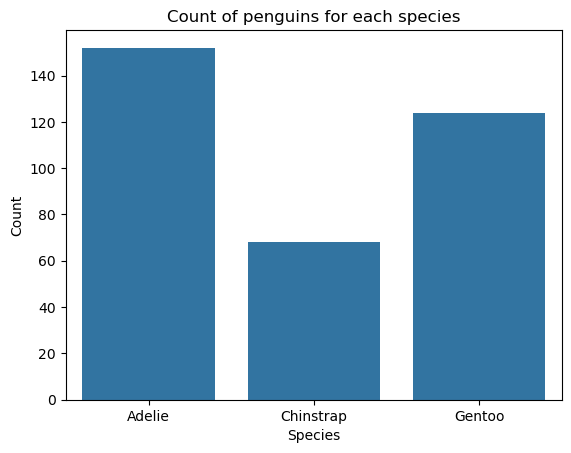

In [5]:
sns.countplot(x="species", data=penguins_data)
plt.title("Count of penguins for each species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
YES, LOOKS NORMALLY DISTRIBUTED!

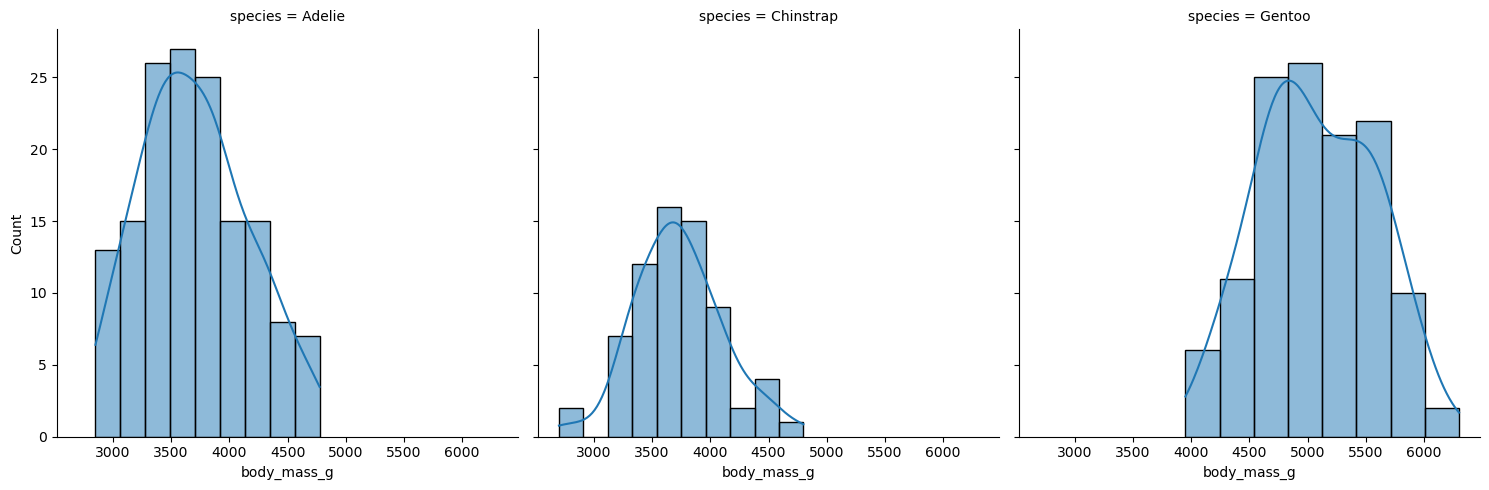

In [6]:
g=sns.FacetGrid(penguins_data, col="species", height = 5)
g.map(sns.histplot, "body_mass_g", kde=True)

3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
- Answer: No difference, null hypothesis is true!

Justification for chosen test:
* Null hypothesis = No difference in body mass between Adelie and Chinstrap
* Alternative hypothesis: There is a difference between Adelie and Chinstrap!
* P-value threshold == 0.05 

-- We are comparing data continuous, and large samplesize (above 15), is parametric (normalized?). Number of variables = 2, different group, "student t test"  

In [7]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguins_data_copy = penguins_data.copy()

In [9]:
penguins_data_copy = penguins_data_copy.dropna()

In [10]:
penguins_data_copy.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
338,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [11]:
penguins_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [12]:
stats.ttest_ind(penguins_data_copy[penguins_data_copy["species"]=="Adelie"]["body_mass_g"], penguins_data_copy[penguins_data_copy["species"]=="Chinstrap"]["body_mass_g"])

TtestResult(statistic=np.float64(-0.42011219955863177), pvalue=np.float64(0.6748289682757558), df=np.float64(212.0))

4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [13]:
penguins_data_copy

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Justification for chosen test:
* Null hypothesis = No difference in body mass between Chinstrap and Gentoo
* Alternative hypothesis: There is a difference between Chinstrap and Gentoo! - Seems to hold true here (alternative)
* P-value threshold == 0.05 

- We are comparing datam continuous, and large samplesize (above 15), is parametric (normalized?). Number of variables = 2, different group, "student t test"  

In [14]:
stats.ttest_ind(penguins_data_copy[penguins_data_copy["species"]=="Chinstrap"]["body_mass_g"], penguins_data_copy[penguins_data_copy["species"]=="Gentoo"]["body_mass_g"])

TtestResult(statistic=np.float64(-19.33454832714746), pvalue=np.float64(2.781745579785546e-46), df=np.float64(185.0))

Theres clearly a difference!

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [15]:
df = pd.read_csv("fb_like_and_share.csv", sep=";")
df

,type,likes_count_fb,shares_count_fb
0,video,577,7
1,photo,2802,23
2,video,490,14
3,link,535,16
4,photo,1049,44
5,photo,1557,85
6,photo,838,1
7,status,467,4
8,photo,100,1
9,video,112,3


1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).

- ##### Justification for test: 
- We want to compare likes (continuous), between 2 groups: photos and videos. 
- Data seems not normalized, and seems left skewed. Although they don't seem to have the same shape of distribution
- Data not paired(different groups)
- Sample size is below 15 foreach group, we denote this as small.
- - Thus we make non-parametric test (we compare medians?). As we got 2 variables, but in different group, we do a mann-whitney U test

##### Null hypothesis: There is no difference in distribution of likes for photos and videos
- Alternative hypothesis: There is a difference in distribution...., (We do a two sided test)
* P-value threshold == 0.05 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             32 non-null     object
 1   likes_count_fb   32 non-null     int64 
 2   shares_count_fb  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 900.0+ bytes


In [17]:
df["type"].value_counts()

type
photo     13
video      9
status     6
link       4
Name: count, dtype: int64

In [18]:
df_filtered = df[df["type"].isin(["photo", "video"])]
df_filtered

,type,likes_count_fb,shares_count_fb
0,video,577,7
1,photo,2802,23
2,video,490,14
4,photo,1049,44
5,photo,1557,85
6,photo,838,1
8,photo,100,1
9,video,112,3
10,photo,1258,19
11,photo,487,5


#### Below we see that photos have a higher median for likes. We also see that photo have an outlier: 

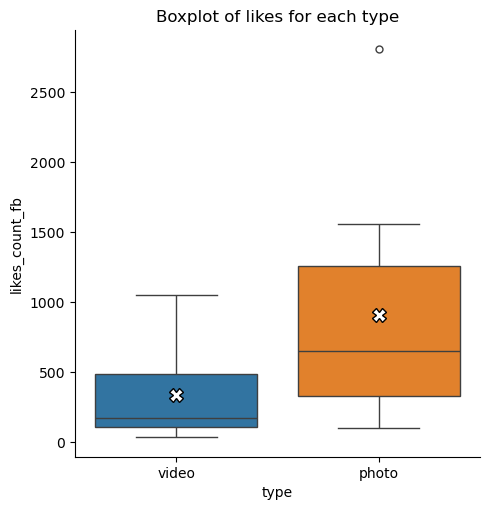

In [19]:
sns.catplot(x="type", y = "likes_count_fb", hue = "type", data = df_filtered, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of likes for each type")
plt.show()

#### Looking closer at the shape of distribution, we see that they both are right skewed. However, for photos the median is higher

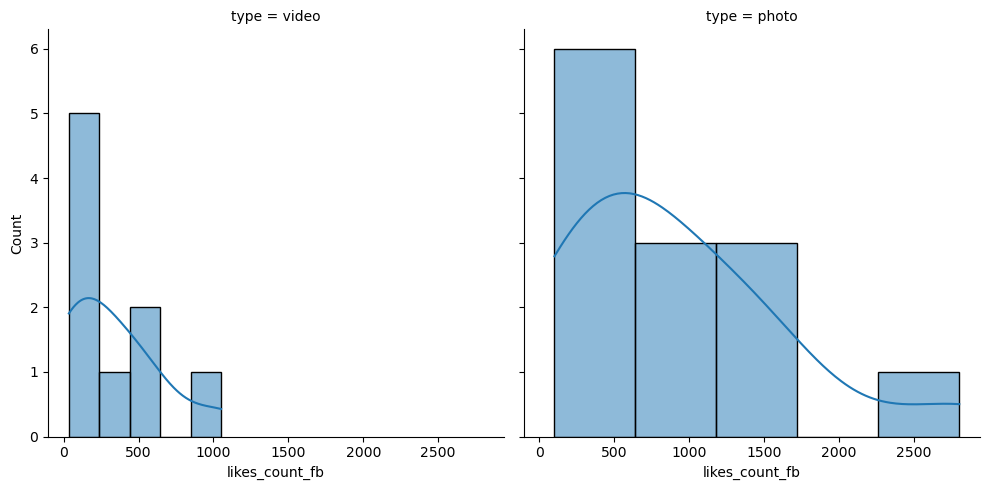

In [20]:
g=sns.FacetGrid(df_filtered, col="type", height = 5)
g.map(sns.histplot, "likes_count_fb", kde=True)
plt.show()

In [21]:
stats.mannwhitneyu(df_filtered[df_filtered["type"]=="video"]["likes_count_fb"], df_filtered[df_filtered["type"]=="photo"]["likes_count_fb"])

MannwhitneyuResult(statistic=np.float64(26.0), pvalue=np.float64(0.0326063047830172))

We reject the null hypothesis, based on our threshold, although the statistical difference is not the greatest

In [22]:
df_filtered.groupby("type")["likes_count_fb"].median()

type
photo    653.0
video    175.0
Name: likes_count_fb, dtype: float64

2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).

- ##### Justification for test: 
- We want to compare share (continuous), between 2 groups: photos and videos. 
- Data seems not normalized, and seems left skewed
- Data not paired(different groups)
- Sample size is below 15 foreach group, we denote this as small.
- - Thus we make non-parametric test (we compare medians?). As we got 2 variables, but in different group, we do a mann-whitney U test

##### Null hypothesis: There is no difference in distribution of shares for photos and videos
- Alternative hypothesis: There is a difference in distribution.... (2 sided test)
* P-value threshold == 0.05 

##### Compared to the likes, shares seems to have a median slightly closer to each other. Although value range for photo is greater. For video, we also see an outlier 

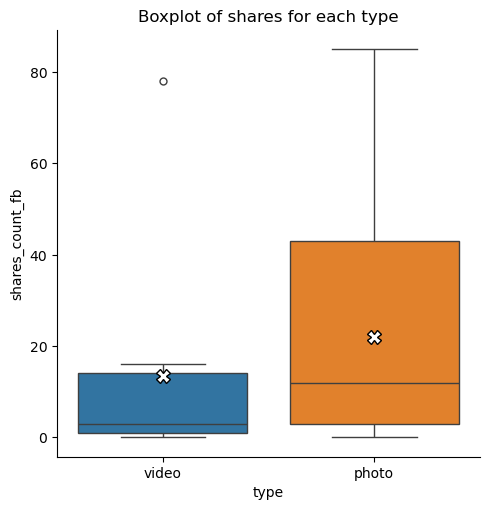

In [23]:
sns.catplot(x="type", y = "shares_count_fb", hue = "type", data = df_filtered, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of shares for each type")
plt.show()

#### Taking a closer look we se, that both are right skewed. It becomes even more apparant, that they don't have the same shape. Time for testing!

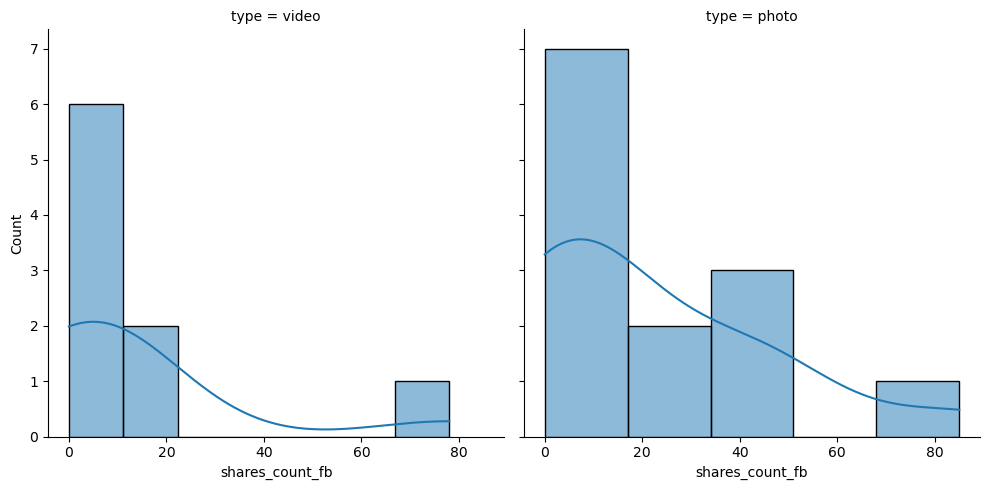

In [24]:
g=sns.FacetGrid(df_filtered, col="type", height = 5)
g.map(sns.histplot, "shares_count_fb", kde=True)
plt.show()

In [25]:
stats.mannwhitneyu(df_filtered[df_filtered["type"]=="video"]["shares_count_fb"], df_filtered[df_filtered["type"]=="photo"]["shares_count_fb"])

MannwhitneyuResult(statistic=np.float64(42.0), pvalue=np.float64(0.28368085995763015))

#### We reject null-hypothesis, and with a lower p-value compared to test with likes

In [26]:
df_filtered.groupby("type")["shares_count_fb"].median()

type
photo    12.0
video     3.0
Name: shares_count_fb, dtype: float64

3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?

- - sds

In [27]:
df.groupby("type")["shares_count_fb"].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
link,4.0,19.500000,3.000000,16.0,17.50,20.0,22.0,22.0
photo,13.0,22.000000,25.829570,0.0,3.00,12.0,43.0,85.0
status,6.0,21.000000,21.447611,0.0,3.25,18.0,35.0,51.0
video,9.0,13.444444,24.930459,0.0,1.00,3.0,14.0,78.0


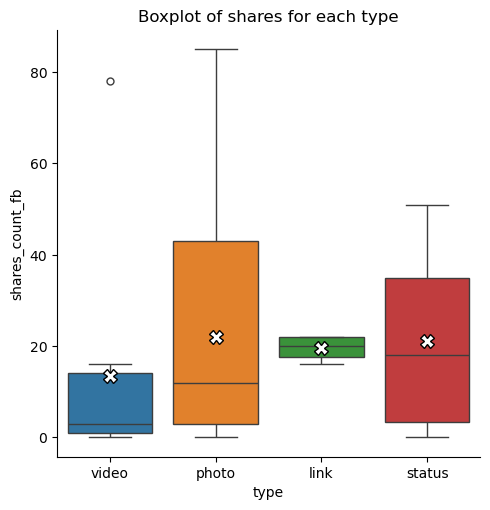

In [28]:
sns.catplot(x="type", y = "shares_count_fb", hue = "type", data = df, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of shares for each type")
plt.show()

### As seen below

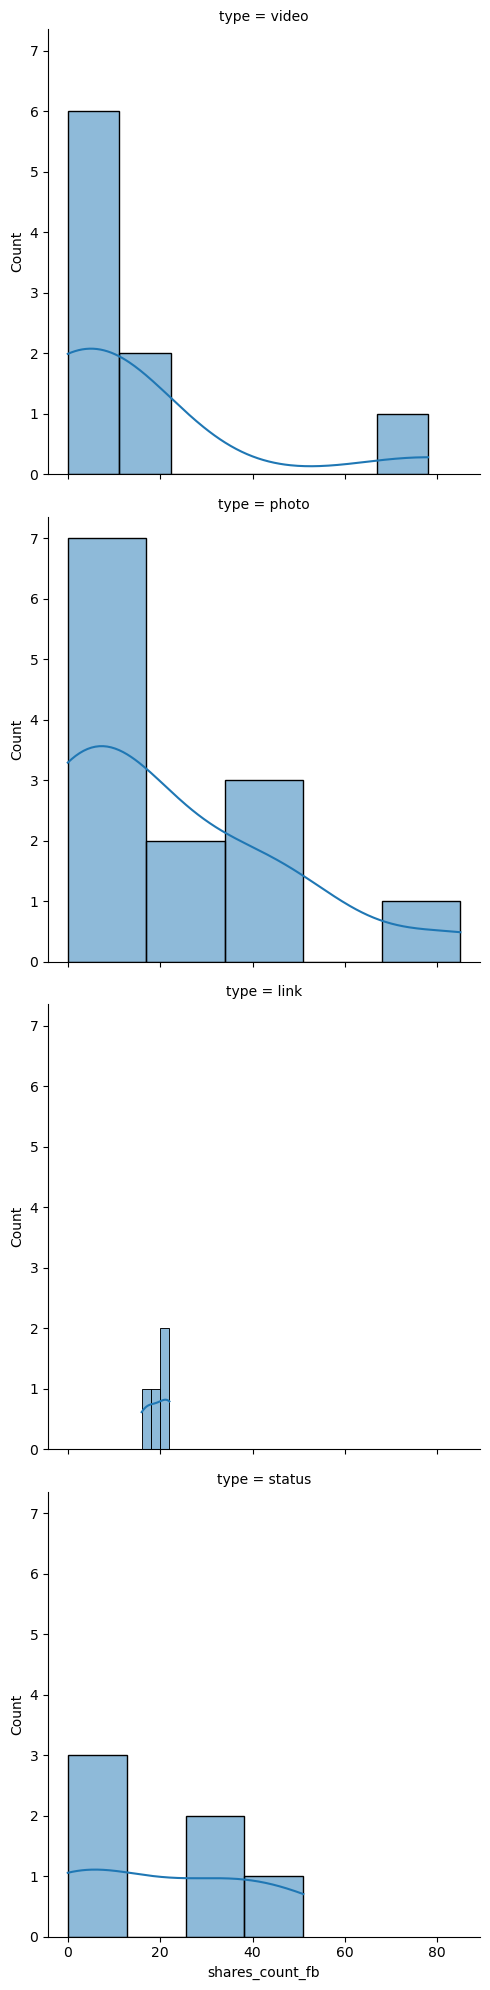

In [29]:
g=sns.FacetGrid(df, row="type", height = 5)
g.map(sns.histplot, "shares_count_fb", kde=True)
plt.show()

#### We see that the data is not normally distributed. Status and link seems to be neither left or right skewed. Photos and Videos is right skewed

In [30]:
stats.f_oneway(df[df["type"]=="video"]["shares_count_fb"],
               df[df["type"]=="photo"]["shares_count_fb"],
               df[df["type"]=="link"]["shares_count_fb"],
               df[df["type"]=="status"]["shares_count_fb"])         

F_onewayResult(statistic=np.float64(0.2558147061883985), pvalue=np.float64(0.8565314091757278))

#### Here the null-hypothesis is NOT rejected. The test indicates that there are no significant different in shares between types 

However! We can doubt whether performing this tests is desirable. One could argue that performing an parametric test is not appropriate in this context. The data does not have a normal destribution, and the sample size is small

We should instead perform a non-parametric test, as we are comparing data that has a somewhat, skewed distribution and sample size is small. As the number of variables is greater than 3, we now try testing with kruskal-wallis. Although the test assumes same distribution of data, I regard that the skewenedness are somehow equal, although the type "link" is (maybe) an execption?

In [31]:
stats.kruskal(df[df["type"]=="video"]["shares_count_fb"],
               df[df["type"]=="photo"]["shares_count_fb"],
               df[df["type"]=="link"]["shares_count_fb"],
               df[df["type"]=="status"]["shares_count_fb"])

KruskalResult(statistic=np.float64(2.9065336213816875), pvalue=np.float64(0.40626147645400257))

#### Here the null-hypothesis get rejected, thus indicating that the medians are different between the groups 

4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

#### Yes! Kruskal test shows that the difference in distribution, in regards to medians, differ. This alligns with the below:


In [32]:
df.groupby("type")["shares_count_fb"].median()

type
link      20.0
photo     12.0
status    18.0
video      3.0
Name: shares_count_fb, dtype: float64

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [33]:
df_energy = pd.read_csv("energySoftware.csv")
df_energy

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


1. Plot the distribution of CPU for each test type

In [34]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB


In [35]:
df_energy["test"].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

#### We start by plotting distribution of CPU pr type. At first we illustrate the means. 
- It is clear that the means differ between the groups. 
- In regards of outliers, it seems to not be anything significant. ¨
- Lets take a closer look at the distribution!

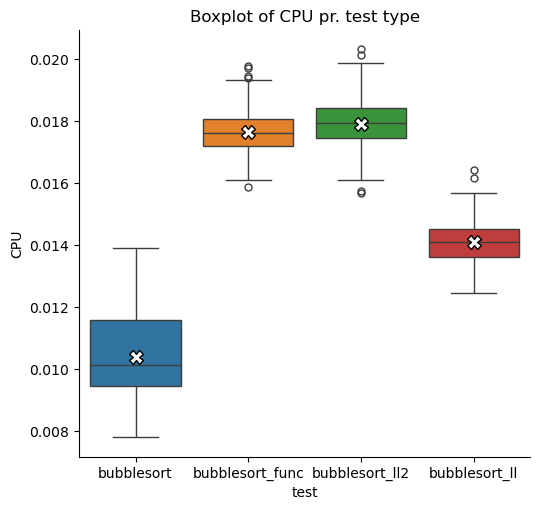

In [36]:
sns.catplot(x="test", y = "CPU", hue = "test", data = df_energy, kind="box",aspect=1.1,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of CPU pr. test type")
plt.show()

#### We take a further look at the distributions. 
- At first glance at the distributions, all types look somewhat normal. The type, bubblesort, seems to be skewing slightly to right. Also bubblesort has a little spike in the right skew. 

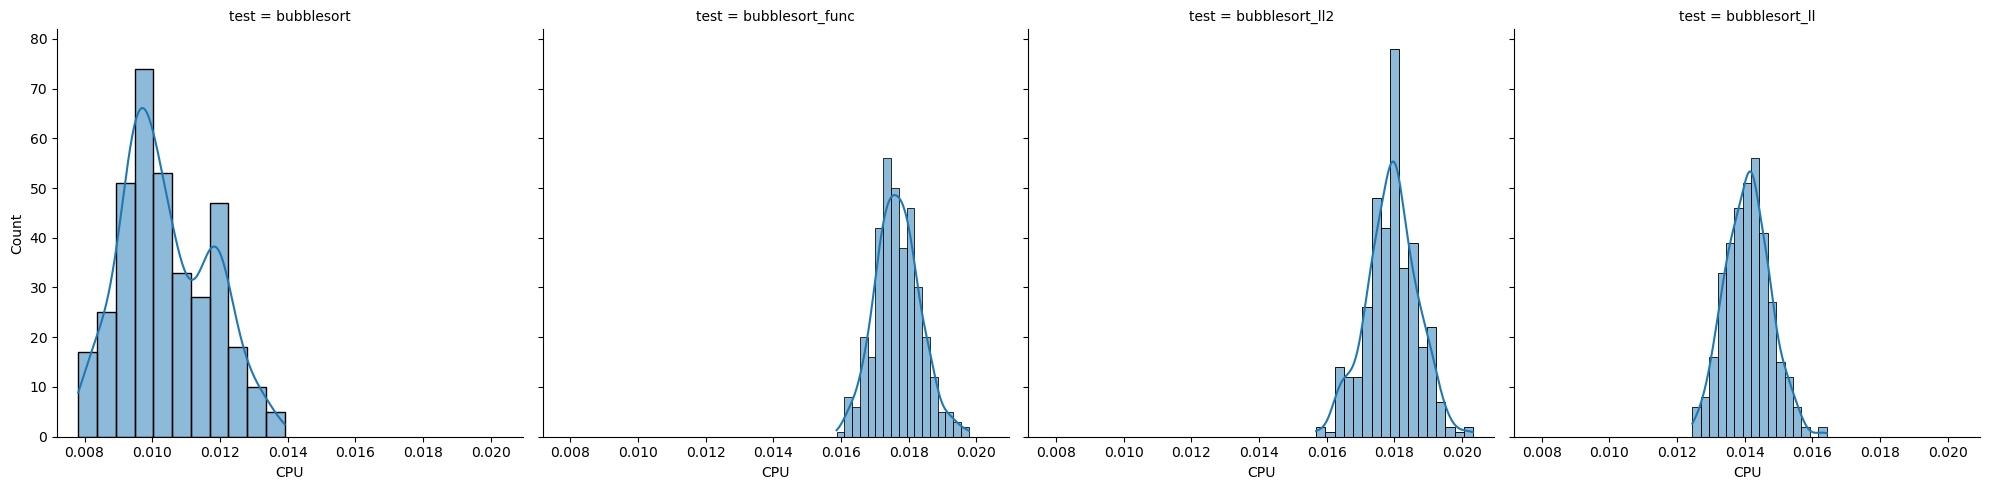

In [37]:
g=sns.FacetGrid(df_energy, col="test", height = 5)
g.map(sns.histplot, "CPU", kde=True)
plt.show()

2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 

#### Justification:
-We are working with continous data, We pick an parametric test, thus combaring with mean) as it seems like the variable are normally distributed. The sample size is large, and data is not paired(independant). As mentioned, no significant outliers is present. Thus we move forward by testing with the Student t-test
#### Null-hypothesis: There is no difference in average (mean) CPU values for bubblesort and bubblesort_ll. Alternative: THere is..
- Threshold: 0.05

In [38]:
stats.ttest_ind(df_energy[df_energy["test"]=="bubblesort"]["CPU"], df_energy[df_energy["test"]=="bubblesort_ll"]["CPU"])

TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686370246e-224), df=np.float64(719.0))

##### Our test indicates, that there is clearly a difference! 

3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?

##### We again go with the same justification and p-value threshold, but with the null-hypothesis: There is no difference in average (mean) CPU values for bubblesort_func and bubblesort_ll2. Alternative: THere is..

In [39]:
stats.ttest_ind(df_energy[df_energy["test"]=="bubblesort_func"]["CPU"], df_energy[df_energy["test"]=="bubblesort_ll2"]["CPU"])

TtestResult(statistic=np.float64(-4.692273179928857), pvalue=np.float64(3.2355729348933066e-06), df=np.float64(718.0))

#### As expected, we can reject the null-hypothesis 

In [40]:
df_energy[df_energy["test"] == "bubblesort_func"]["CPU"].mean() - df_energy[df_energy["test"] == "bubblesort_ll2"]["CPU"].mean()


np.float64(-0.00025007459852430594)

#### As seen above, the mean difference is quite small. So it is true that they differ, but not very much..

4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).

##### As before, we make a boxplot but with x as test and y as time

In [41]:
energy_filtered = df_energy[df_energy["test"].isin(["bubblesort", "bubblesort_ll"])]
energy_filtered


,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


In [42]:
energy_filtered.groupby("test")["time"].count()

test
bubblesort       361
bubblesort_ll    360
Name: time, dtype: int64

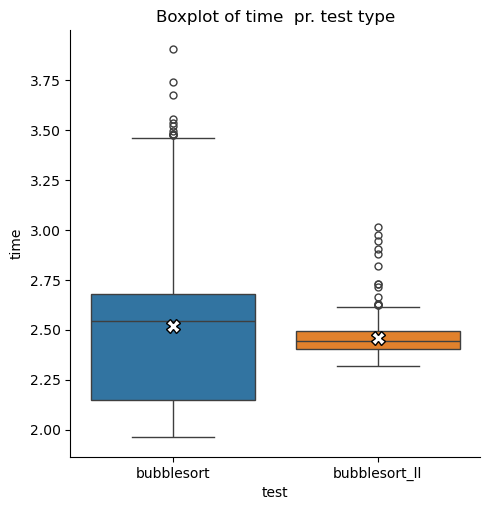

In [43]:
sns.catplot(x="test", y = "time", hue = "test", data = energy_filtered, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of time  pr. test type")
plt.show()

By looking at the boxplot, it's hard to tell whether there is a difference in time, in regards of bubblesort and bubblesort_2. However, we can see that there are a significant amount of outliers. 

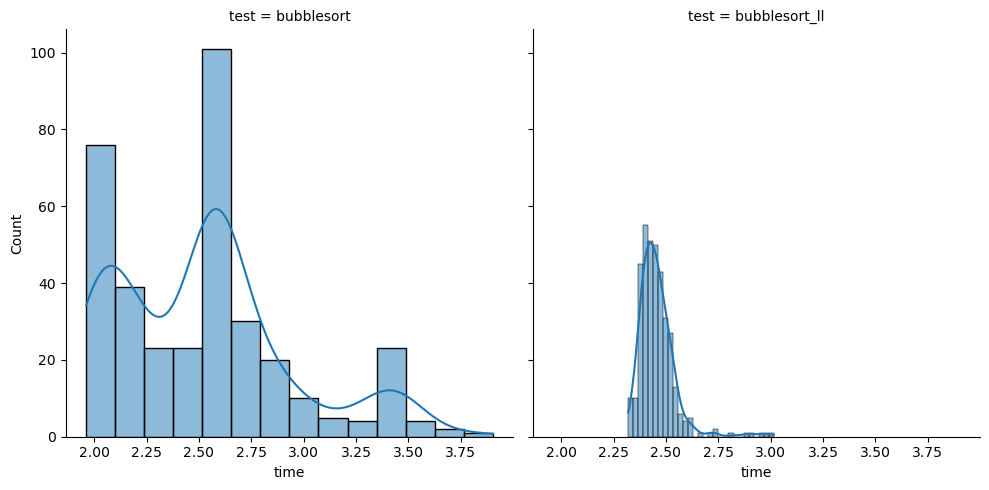

In [44]:
g=sns.FacetGrid(energy_filtered, col="test", height = 5)
g.map(sns.histplot, "time", kde=True)
plt.show()

As expected we are also able to see the outliers, in the above histogram. Both dont have a normal distribution. Instead, bubblesort_2 is clearly right skewed. There are some noticeable spikes in the bubblesort, and it is also right-

At first glance, Kruskal-Wallis test might seem applicable. Although the data is not normally distributed, they do not have the same shape
- Instead we move forward with the Mann-Whitney U test. This non-parametric test, (median) is applicable, even though our sample set is not small, as our distributions are skewed

- Null hypothesis: There is no difference in time between test bubblesort and bubblesort_2
- - Threshold: 0.05

In [45]:
stats.kruskal(energy_filtered[energy_filtered["test"]=="bubblesort"]["time"], energy_filtered[energy_filtered["test"]=="bubblesort_ll"]["time"])

KruskalResult(statistic=np.float64(12.737963993979294), pvalue=np.float64(0.0003583075341899954))

### We can reject the null-hyptothesis, confirming that there is a difference in time in regards of the 2 mentioned tests

5. Perform an ANOVA test to test if there is a difference in means across groups for CPU

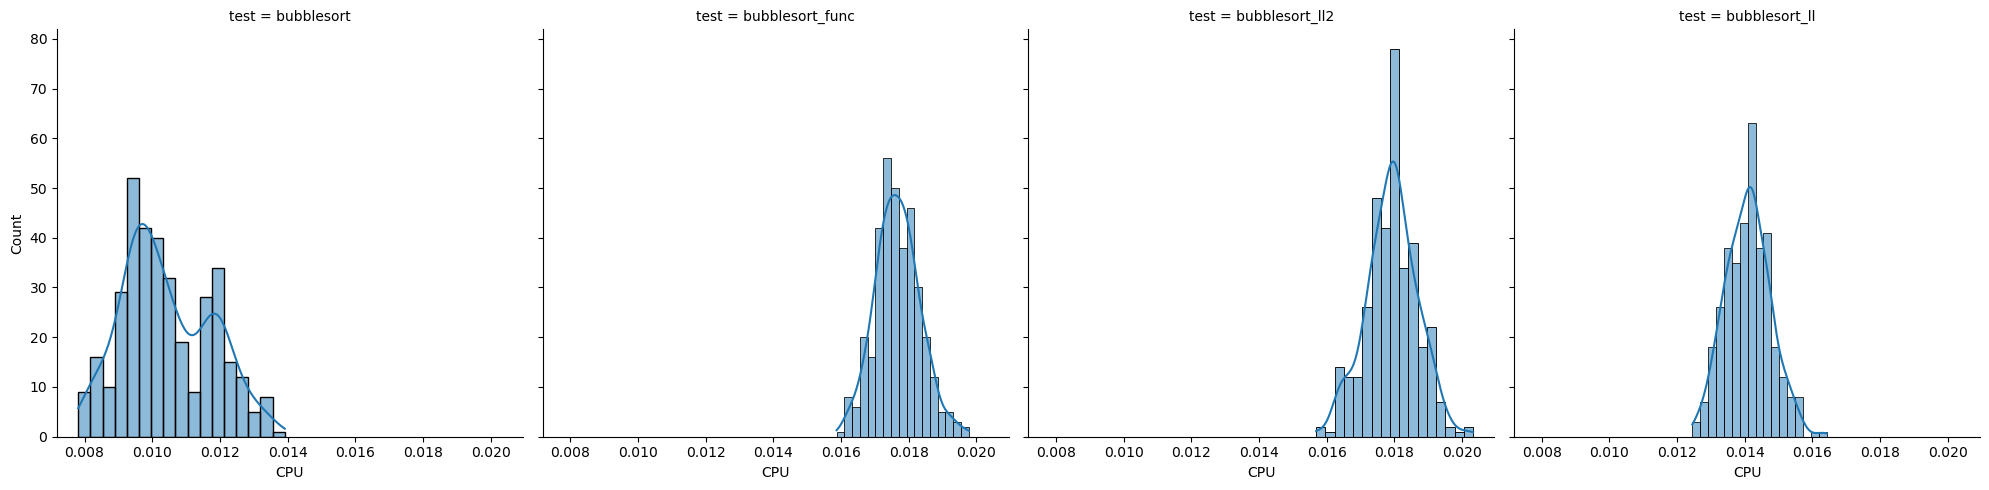

In [49]:
g=sns.FacetGrid(df_energy, col="test", height = 5)
g.map(sns.histplot, "CPU", kde=True, bins = 17)
plt.show()

In [47]:
stats.f_oneway(df_energy[df_energy["test"]=="bubblesort"]["CPU"],
               df_energy[df_energy["test"]=="bubblesort_ll"]["CPU"],
               df_energy[df_energy["test"]=="bubblesort_ll2"]["CPU"],
               df_energy[df_energy["test"]=="bubblesort_func"]["CPU"])         

F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))

6. Perform an ANOVA test to test if there is a difference in means across groups for time

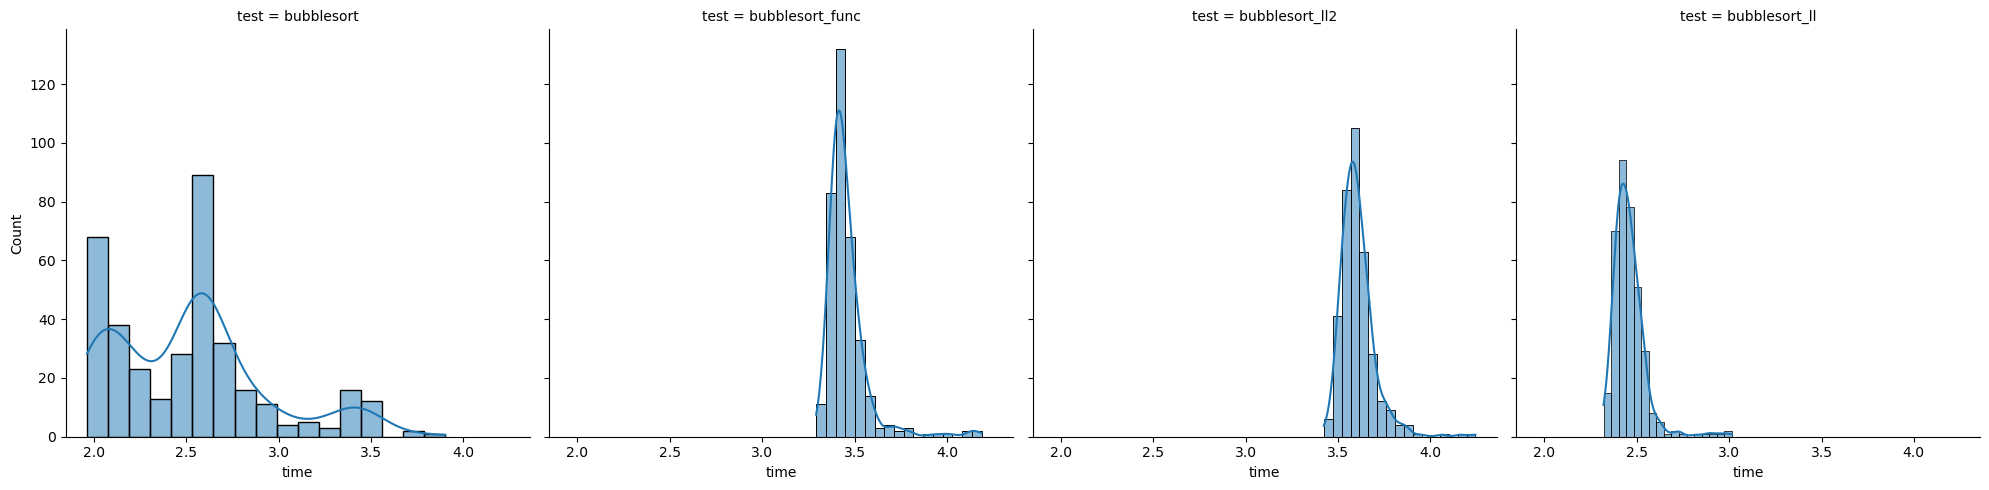

In [50]:
g=sns.FacetGrid(df_energy, col="test", height = 5)
g.map(sns.histplot, "time", kde=True, bins = 17)
plt.show()

In [48]:
stats.f_oneway(df_energy[df_energy["test"]=="bubblesort"]["time"],
               df_energy[df_energy["test"]=="bubblesort_ll"]["time"],
               df_energy[df_energy["test"]=="bubblesort_ll2"]["time"],
               df_energy[df_energy["test"]=="bubblesort_func"]["time"])         

F_onewayResult(statistic=np.float64(2556.3329354127823), pvalue=np.float64(0.0))

It might not make sense to do ANOVA test here, sinse the data is not normally distributed. Instead Kruskal might be a better option, as median is better when outliers is present:

In [55]:
df_energy.groupby("test")["time"].median()

test
bubblesort         2.5410
bubblesort_func    3.4285
bubblesort_ll      2.4430
bubblesort_ll2     3.5905
Name: time, dtype: float64

In [54]:
stats.kruskal(df_energy[df_energy["test"]=="bubblesort"]["time"], df_energy[df_energy["test"]=="bubblesort_ll"]["time"], df_energy[df_energy["test"]=="bubblesort_ll2"]["time"], df_energy[df_energy["test"]=="bubblesort_func"]["time"])

KruskalResult(statistic=np.float64(1129.5156060495178), pvalue=np.float64(1.437383650989963e-244))